In [17]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

plt.rcParams['figure.figsize'] = (20,8)


In [18]:
def average(matches):
    total = 0
    for match in matches:
        total+=match.distance
    return total/len(matches)

def get_similar(filename):

    images = os.listdir("/kaggle/input/reverse-1/images")  # result
    query = cv2.imread(filename)
    query = cv2.cvtColor(query, cv2.COLOR_BGR2RGB)
    query_gray = cv2.cvtColor(query, cv2.COLOR_RGB2GRAY)

    results = []

    for image in tqdm(images,total=len(images)):
        img = cv2.imread(f"/kaggle/input/reverse-1/images/{image}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        sift = cv2.SIFT_create()

        keypoints_1, descriptors_1 = sift.detectAndCompute(query_gray,None)
        keypoints_2, descriptors_2 = sift.detectAndCompute(gray_img,None)

        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
        matches = bf.match(descriptors_1,descriptors_2)

        results.append([img,average(matches)])

    results = sorted(results, key = lambda x: x[1], reverse=False)

    plt.figure(figsize = (4 , 4))
    plt.imshow(query)
    plt.title("Query Image")  # input

    plt.figure(figsize = (20 , 20))
    f, ax = plt.subplots(1,3)
    ax[0].imshow(results[0][0])
    ax[0].set_title("Similar #1")
    ax[1].imshow(results[1][0])
    ax[1].set_title("Similar #2")
    ax[2].imshow(results[2][0])
    ax[2].set_title("Similar #3")
    plt.show()

Input Images

100%|██████████| 23/23 [00:18<00:00,  1.27it/s]


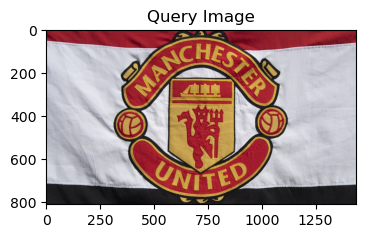

<Figure size 2000x2000 with 0 Axes>

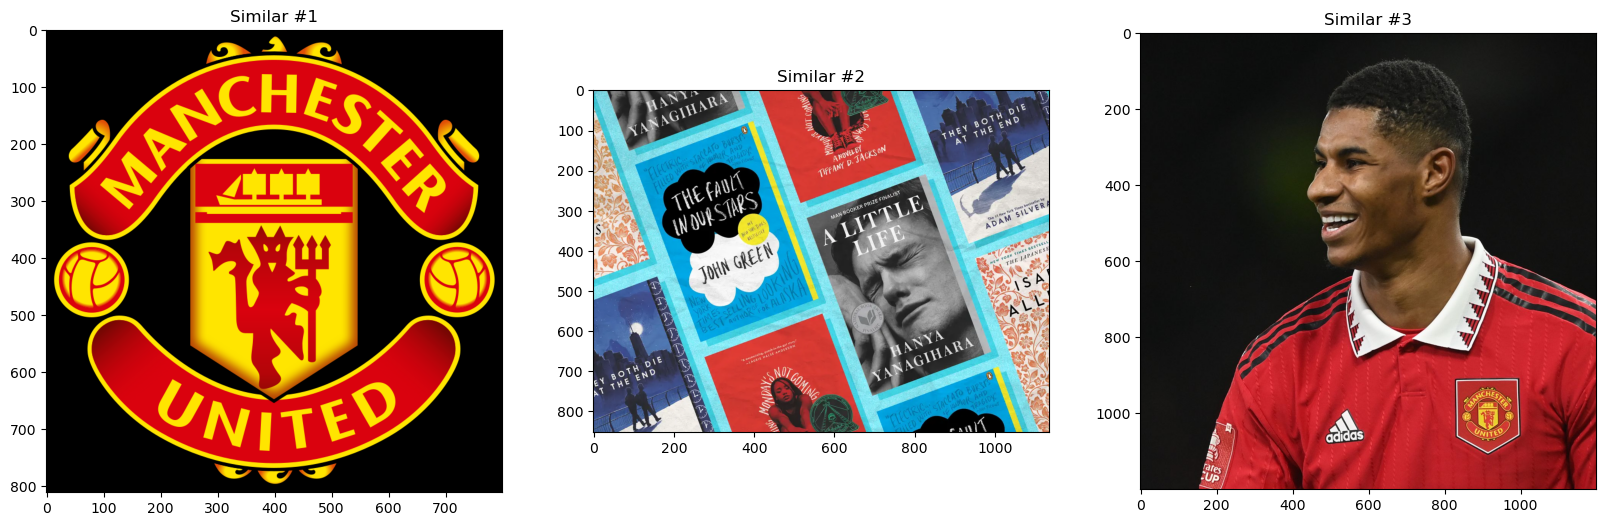

In [19]:
get_similar("/kaggle/input/reverse-2/query images/logo.webp")

100%|██████████| 23/23 [00:37<00:00,  1.63s/it]


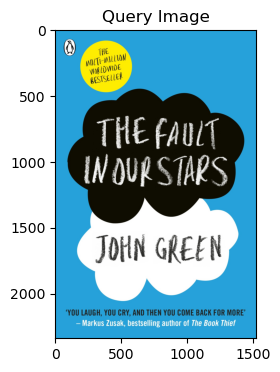

<Figure size 2000x2000 with 0 Axes>

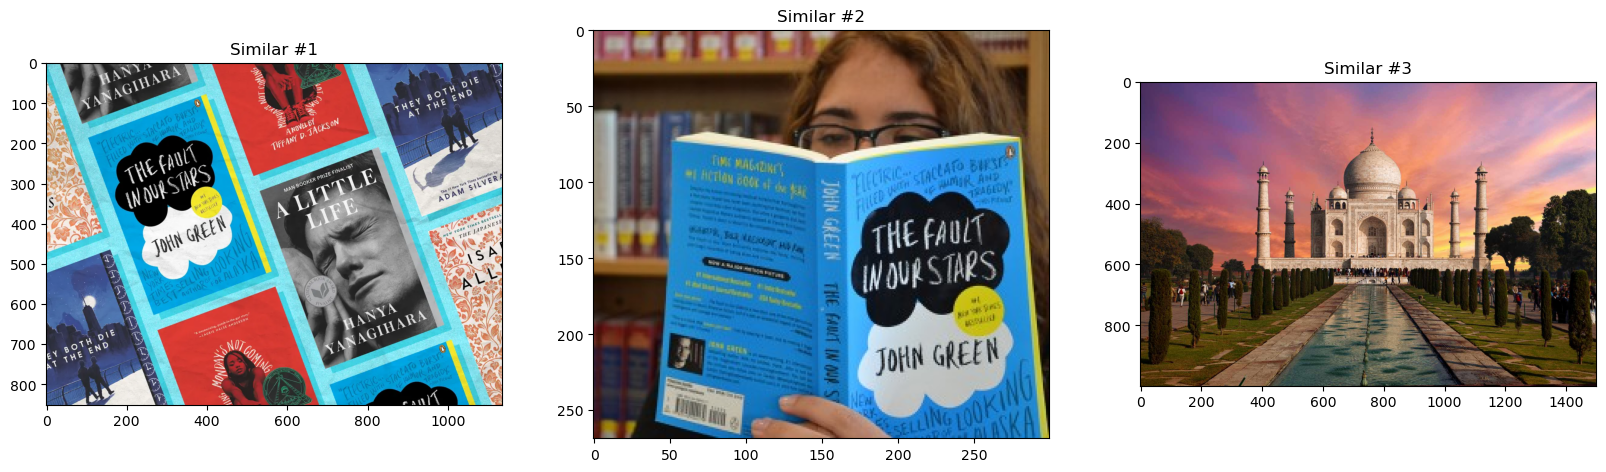

In [20]:
get_similar("/kaggle/input/reverse-2/query images/fios1.jpg")

100%|██████████| 23/23 [00:08<00:00,  2.79it/s]


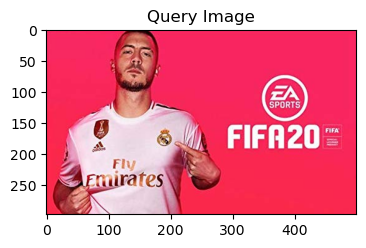

<Figure size 2000x2000 with 0 Axes>

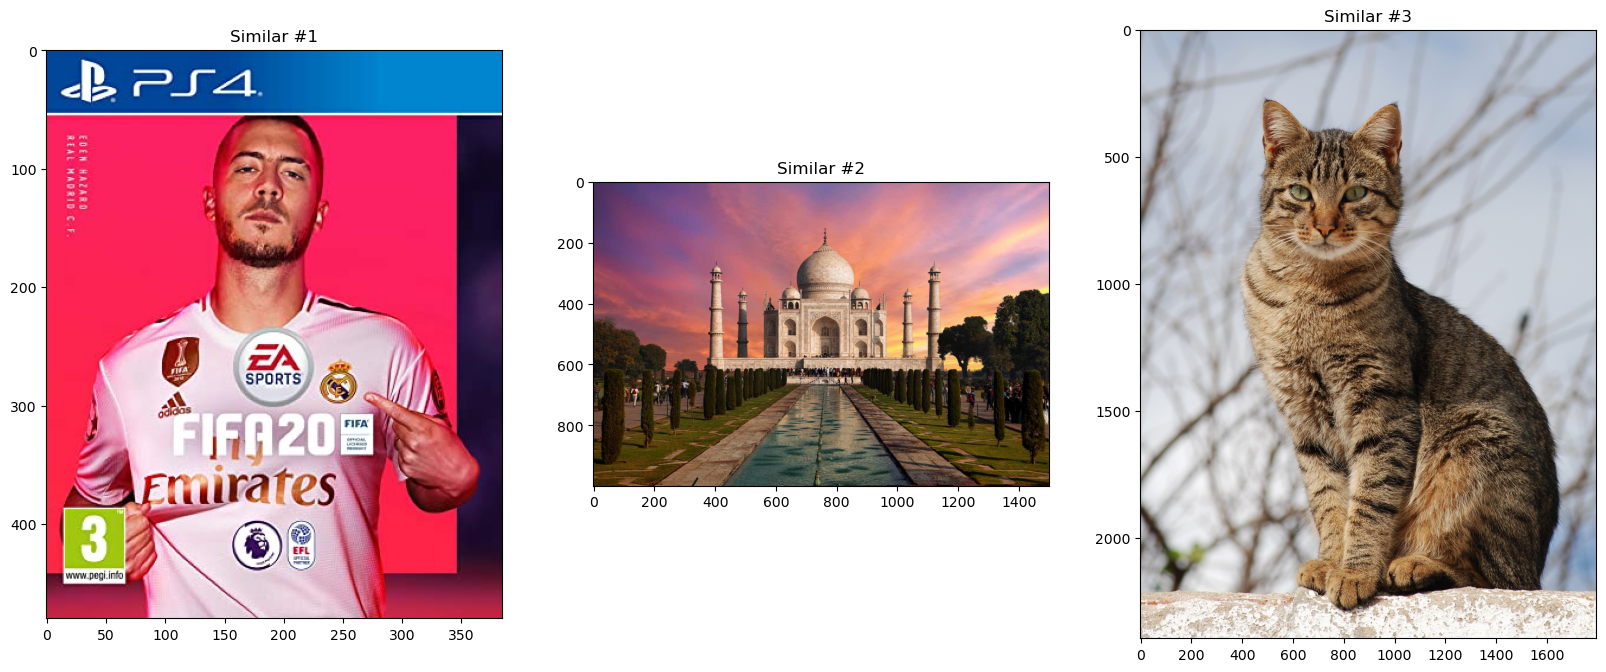

In [21]:
get_similar("/kaggle/input/reverse-2/query images/hazard.jpg")

100%|██████████| 23/23 [00:09<00:00,  2.31it/s]


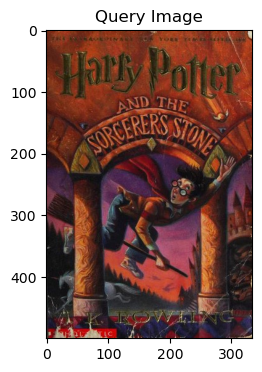

<Figure size 2000x2000 with 0 Axes>

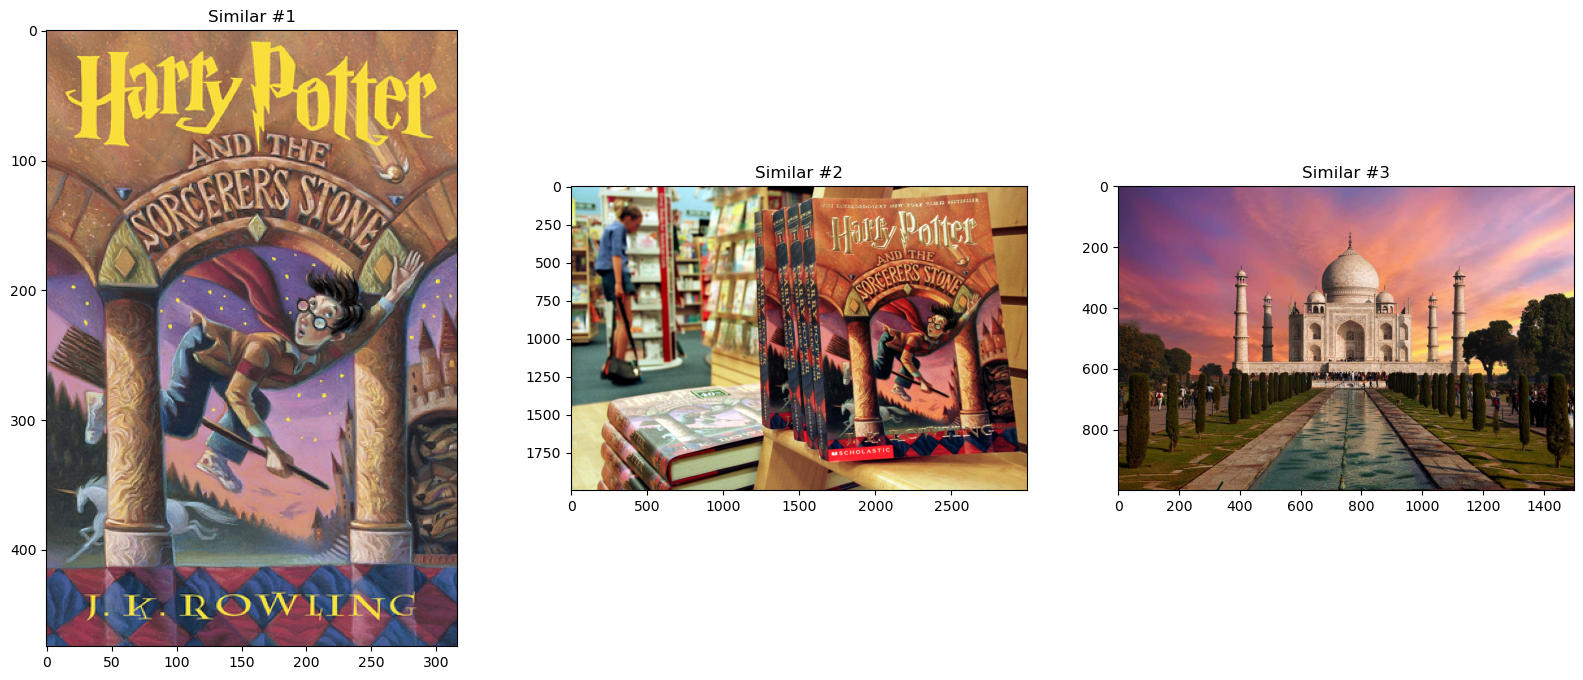

In [22]:
get_similar("/kaggle/input/reverse-2/query images/hpbook.jpg")

100%|██████████| 23/23 [00:08<00:00,  2.57it/s]


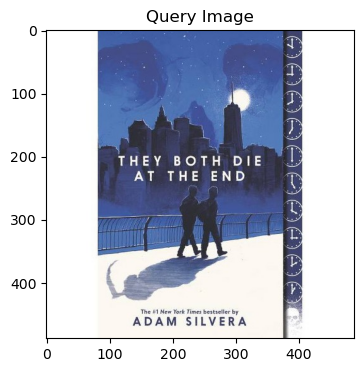

<Figure size 2000x2000 with 0 Axes>

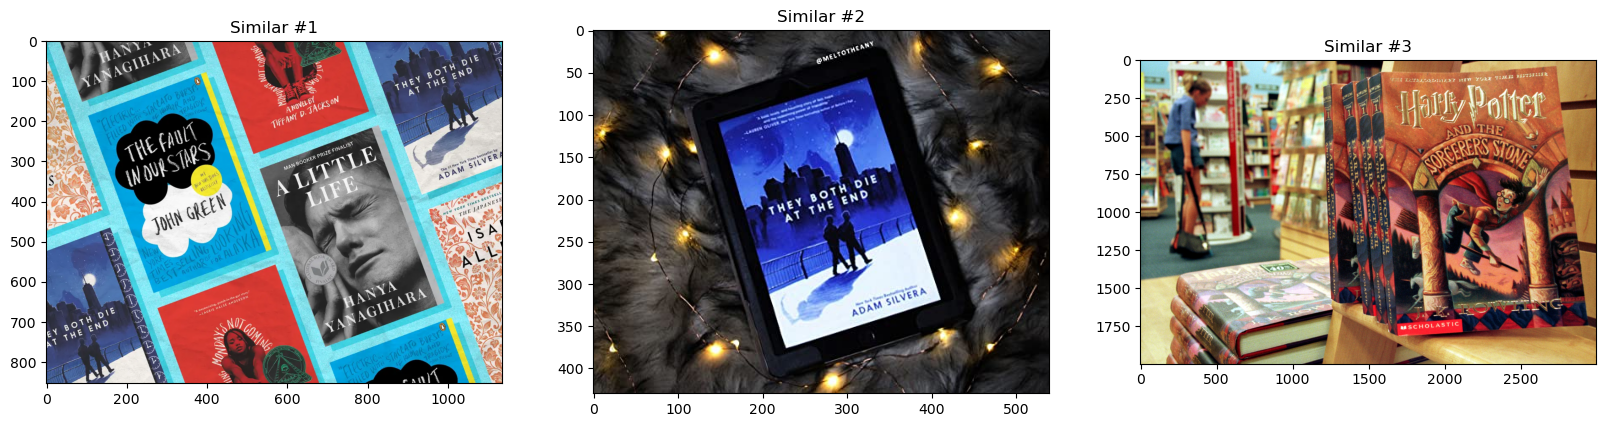

In [24]:
get_similar("/kaggle/input/reverse-2/query images/novel.jpeg")

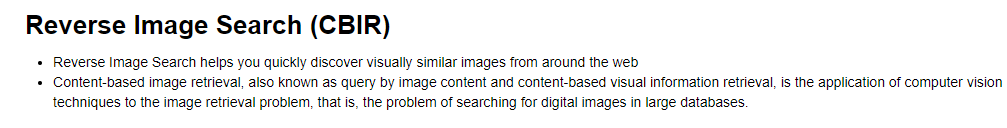

Explanation



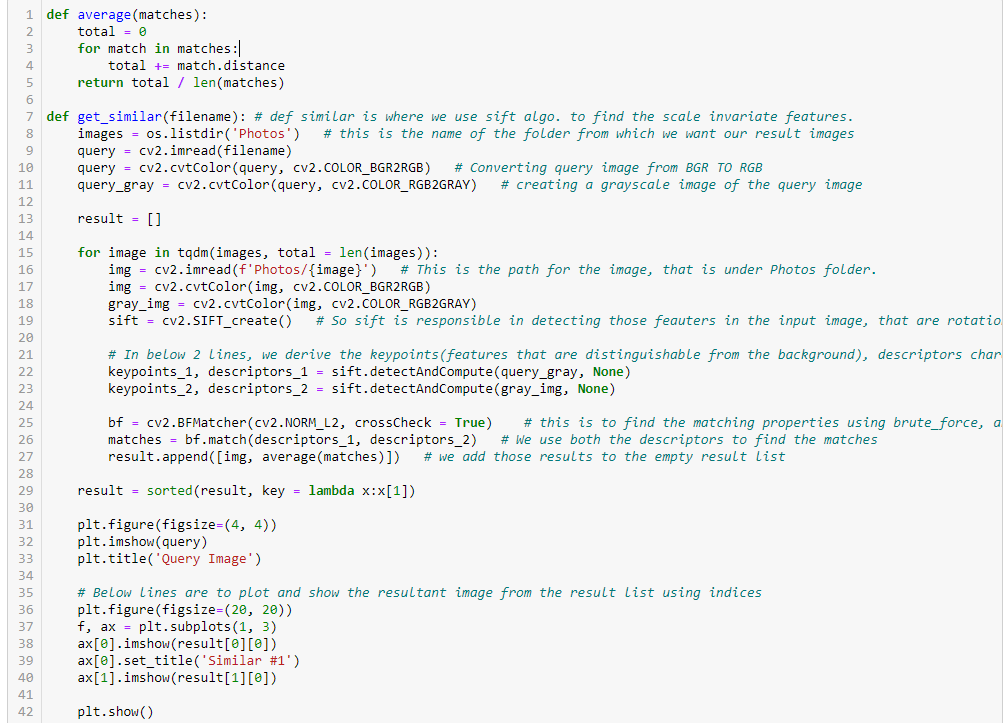
    